veri setini açalım 

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

# Load the dataset
file_path = '/workspaces/Python_final_project/BankChurners.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [76]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [77]:
print(df.isnull().sum())


CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

eksik veri var mı kontrol edelim


In [78]:
# Eksik veri olup olmadığını kontrol etme
missing_data = df.isnull().sum()

# Eksik verilerin olup olmadığını gösterme
missing_data[missing_data > 0]


Series([], dtype: int64)

veriyi temizleyelim

In [79]:
# 1. Son iki sütunu kaldırma
df_cleaned = df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
                              'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

# 2. Bilinmeyen gelir düzeyi ve eğitim düzeyini filtreleme
df_cleaned = df_cleaned[~df_cleaned['Income_Category'].isin(['Bilinmeyen'])]
df_cleaned = df_cleaned[~df_cleaned['Education_Level'].isin(['Bilinmeyen'])]

# Temizlenmiş veri setini inceleyelim
df_cleaned.head()


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# görselleştirme yapalım

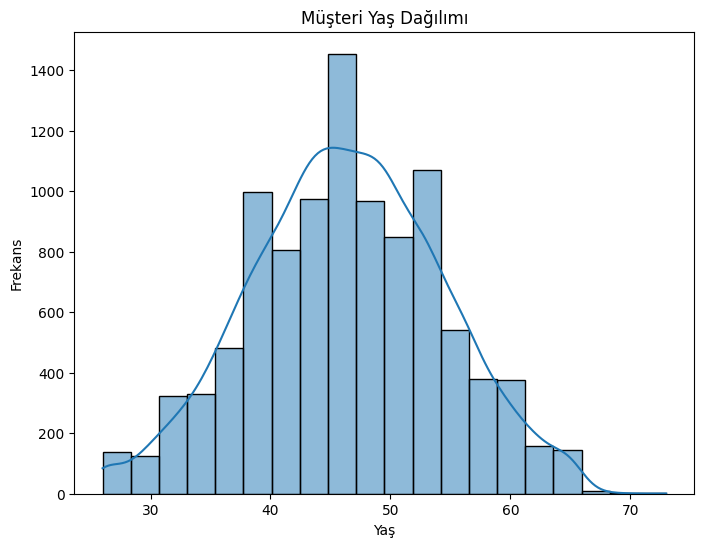

In [80]:

plt.figure(figsize=(8, 6))
sns.histplot(df['Customer_Age'], bins=20, kde=True)
plt.title('Müşteri Yaş Dağılımı')
plt.xlabel('Yaş')
plt.ylabel('Frekans')
plt.show()

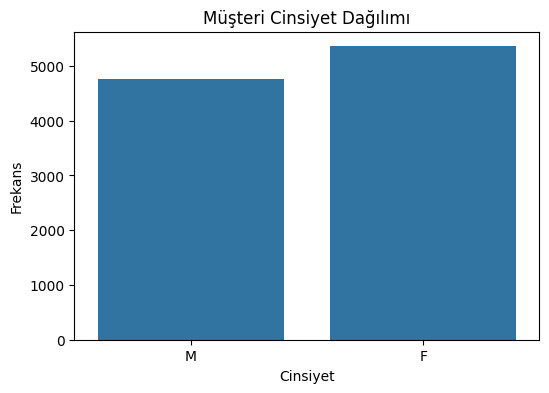

In [81]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df)
plt.title('Müşteri Cinsiyet Dağılımı')
plt.xlabel('Cinsiyet')
plt.ylabel('Frekans')
plt.show()

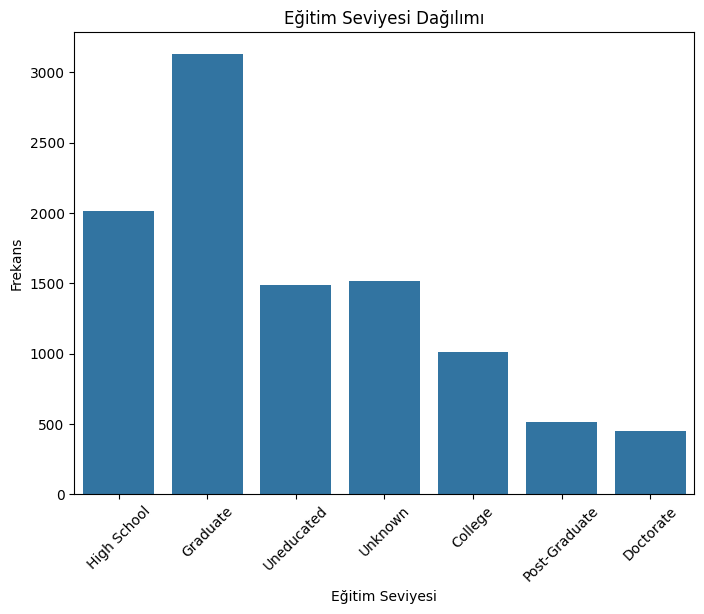

In [82]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Education_Level', data=df)
plt.title('Eğitim Seviyesi Dağılımı')
plt.xlabel('Eğitim Seviyesi')
plt.ylabel('Frekans')
plt.xticks(rotation=45)
plt.show()

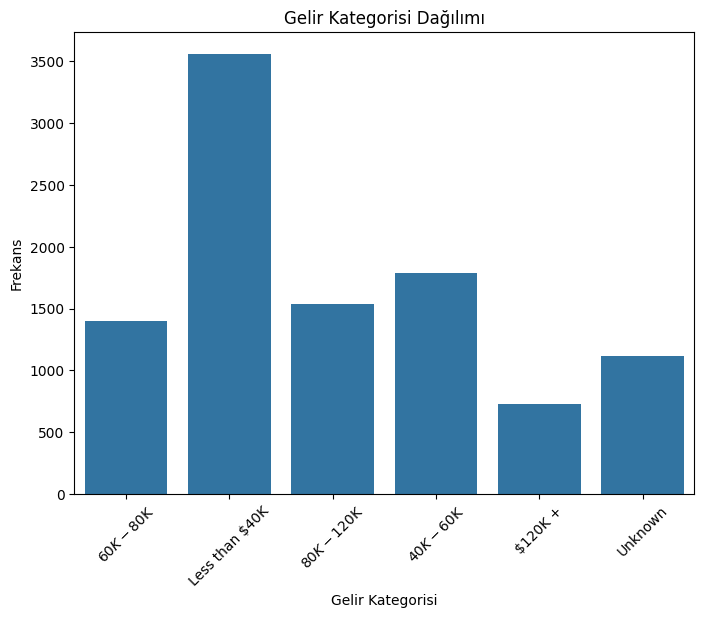

In [83]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Income_Category', data=df)
plt.title('Gelir Kategorisi Dağılımı')
plt.xlabel('Gelir Kategorisi')
plt.ylabel('Frekans')
plt.xticks(rotation=45)
plt.show()

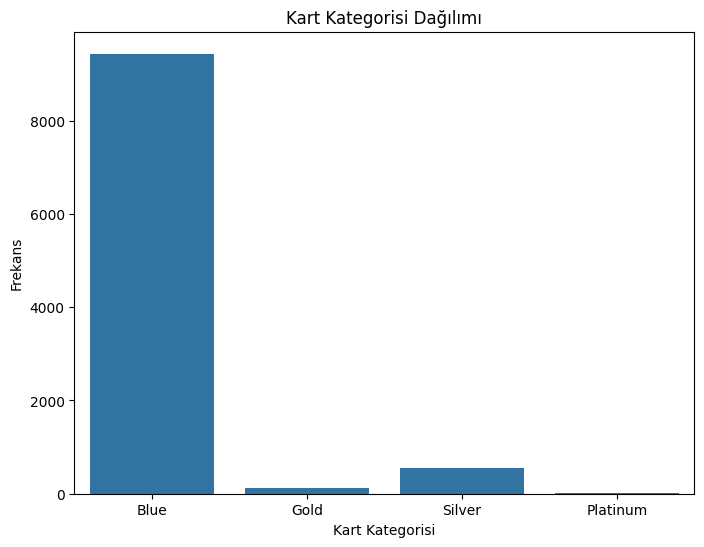

In [84]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Card_Category', data=df)
plt.title('Kart Kategorisi Dağılımı')
plt.xlabel('Kart Kategorisi')
plt.ylabel('Frekans')
plt.show()

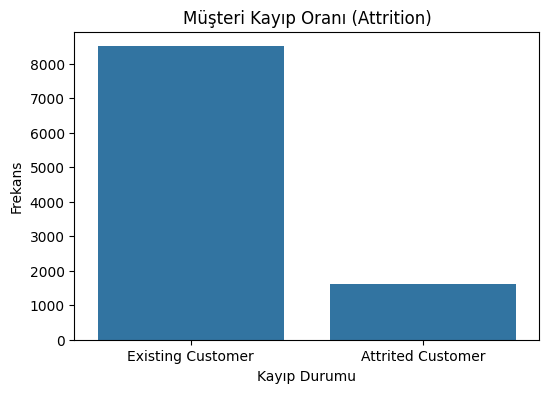

In [85]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition_Flag', data=df)
plt.title('Müşteri Kayıp Oranı (Attrition)')
plt.xlabel('Kayıp Durumu')
plt.ylabel('Frekans')
plt.show()

# 1. Müşterilerin çoğu Mavi Kart sahibi ve yıllık geliri $40K'ın altında.
Mavi Kart sahiplerinin sayısı ve yıllık geliri $40K'ın altında olanların yüzdesini 
bulalım

In [86]:
# 1. Mavi Kart sahiplerini filtreleme
blue_card_customers = df[df['Card_Category'] == 'Blue']

# Mavi Kart sahiplerinin sayısı
blue_card_count = blue_card_customers.shape[0]

# 2. Yıllık geliri $40K'ın altında olanları filtreleme
low_income_customers = df[df['Income_Category'].isin(['Less than $40K', '$40K - $60K'])]

# Yıllık geliri $40K'ın altında olanların sayısı
low_income_count = low_income_customers.shape[0]

# 3. Mavi Kart sahiplerinin ve geliri $40K'ın altında olanların yüzdesi
low_income_percentage = (low_income_customers[low_income_customers['Card_Category'] == 'Blue'].shape[0] / blue_card_count) * 100

print(f"mavi kart sahiplerinin sayısı= {blue_card_count}")

print(f"mavi kart sahiplerinin ve geliri $40k nın altında olanların oranı   %{low_income_percentage} ")



mavi kart sahiplerinin sayısı= 9436
mavi kart sahiplerinin ve geliri $40k nın altında olanların oranı   %53.81517592200085 


# kayıp oranlarını hesaplayalım

In [87]:
gold_customers_40k_80k = df[(df['Card_Category'] == 'Gold') & 
                             (df['Income_Category'] == '$40K - $60K') | 
                             (df['Income_Category'] == '$60K - $80K')]

# Kayıp müşteri sayısı (Attrited Customer)
attrited_customers = gold_customers_40k_80k[gold_customers_40k_80k['Attrition_Flag'] == 'Attrited Customer']
attrited_count = attrited_customers.shape[0]

# Toplam Altın Kart sahibi sayısı
total_gold_customers = gold_customers_40k_80k.shape[0]

# Kayıp oranı
attrition_rate = (attrited_count / total_gold_customers) * 100

print(f"kayıp oranı %{attrition_rate
}")


kayıp oranı %13.479181369089627


In [88]:
# 1. Kayıp oranı yüksek olan müşterileri filtreleyelim
high_attrition_customers = df[df['Attrition_Flag'] == 'Attrited Customer']

# 2. Bu müşterilerin banka ile iletişim sayısını alalım
communication_count = high_attrition_customers['Contacts_Count_12_mon']

# 3. Kayıp oranı ve iletişim sayısının genel istatistiklerini hesaplayalım
mean_communication_count = communication_count.mean()
median_communication_count = communication_count.median()

mean_communication_count = float(mean_communication_count) 
median_communication_count = float(median_communication_count)

print(mean_communication_count, median_communication_count)


2.972341733251383 3.0


Bu sonuçlar, kayıp oranı yüksek olan müşterilerin, banka ile ortalama 3 kez iletişim kurduğunu ve çoğu müşterinin banka ile 3 kez iletişimde bulunduğunu gösteriyor.



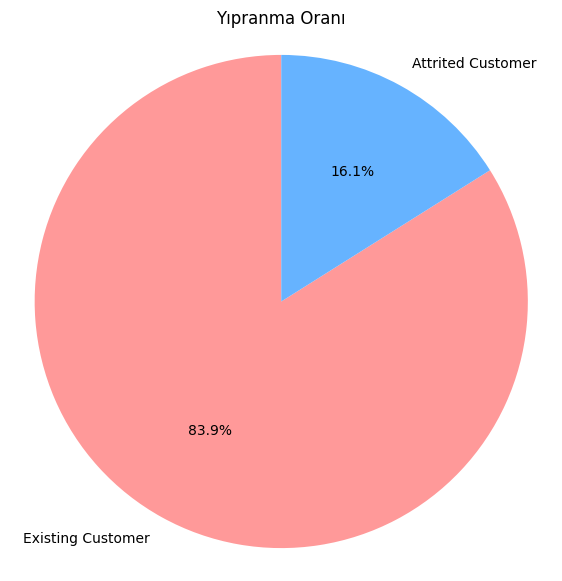

In [89]:

# Yıpranmış ve yıpranmamış müşteri sayısını hesaplayalım
attrition_counts = df['Attrition_Flag'].value_counts()

# Pie chart için görselleştirme
plt.figure(figsize=(7, 7))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=90, colors=["#ff9999","#66b3ff"])
plt.title("Yıpranma Oranı")
plt.axis('equal')  # Eşit eksen, dairesel görünüm için
plt.show()

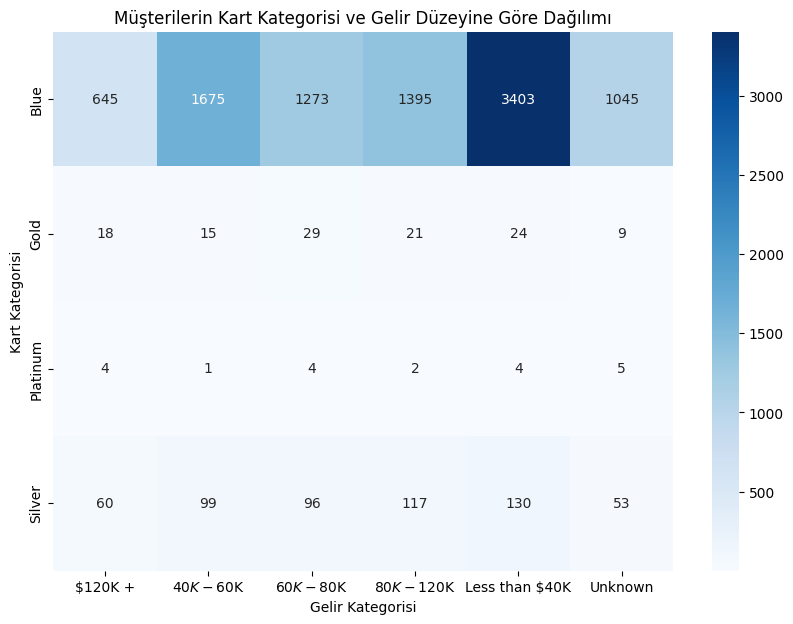

In [90]:


# Card_Category ve Income_Category'ye göre müşteri sayılarının pivot tablosunu oluşturuyoruz
pivot_table = df.pivot_table(index='Card_Category', columns='Income_Category', values='CLIENTNUM', aggfunc='count')

# Isı haritası (heatmap) görselleştirmesi
plt.figure(figsize=(10, 7))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap="Blues", cbar=True)
plt.title('Müşterilerin Kart Kategorisi ve Gelir Düzeyine Göre Dağılımı')
plt.xlabel('Gelir Kategorisi')
plt.ylabel('Kart Kategorisi')
plt.show()


/tmp/ipykernel_1814/1971421361.py:12: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = blue_low_income.pivot_table(index='Age_Group', columns='Gender', values='CLIENTNUM', aggfunc='count')


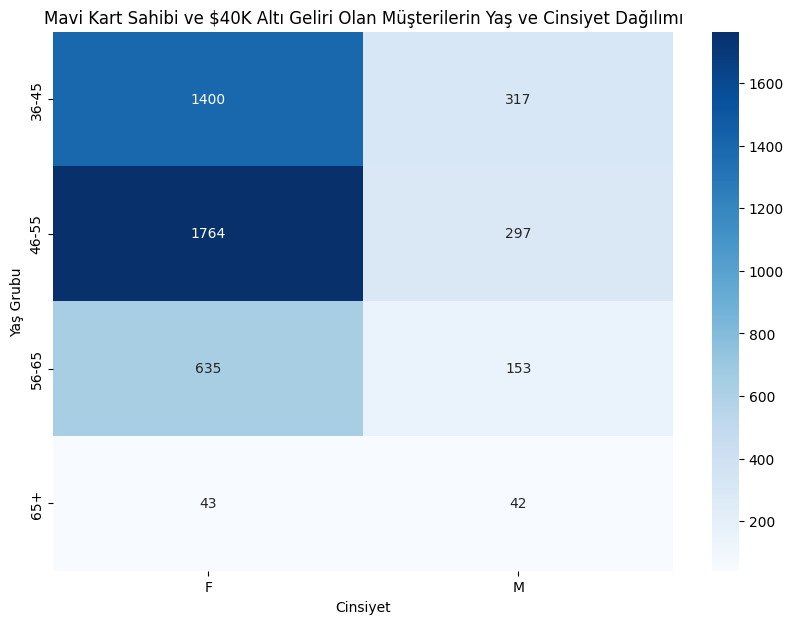

In [91]:


# Yaş aralıklarını belirleyelim
bins = [35, 45, 55, 65, 100]
labels = ['36-45', '46-55', '56-65', '65+']

# Yaş sütununu yaş aralıklarına göre gruplayalım
df['Age_Group'] = pd.cut(df['Customer_Age'], bins=bins, labels=labels, right=False)

# Mavi Kart ve $40K altı gelirli müşterileri filtreleyelim
blue_low_income = df[(df['Card_Category'] == 'Blue') & (df['Income_Category'].isin(['Less than $40K', '$40K - $60K']))]

# Cinsiyete göre ve yaş grubuna göre müşteri sayısını hesaplayalım
pivot_table = blue_low_income.pivot_table(index='Age_Group', columns='Gender', values='CLIENTNUM', aggfunc='count')

# Isı haritası (heatmap) görselleştirmesi
plt.figure(figsize=(10, 7))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap="Blues", cbar=True)
plt.title('Mavi Kart Sahibi ve $40K Altı Geliri Olan Müşterilerin Yaş ve Cinsiyet Dağılımı')
plt.xlabel('Cinsiyet')
plt.ylabel('Yaş Grubu')
plt.show()


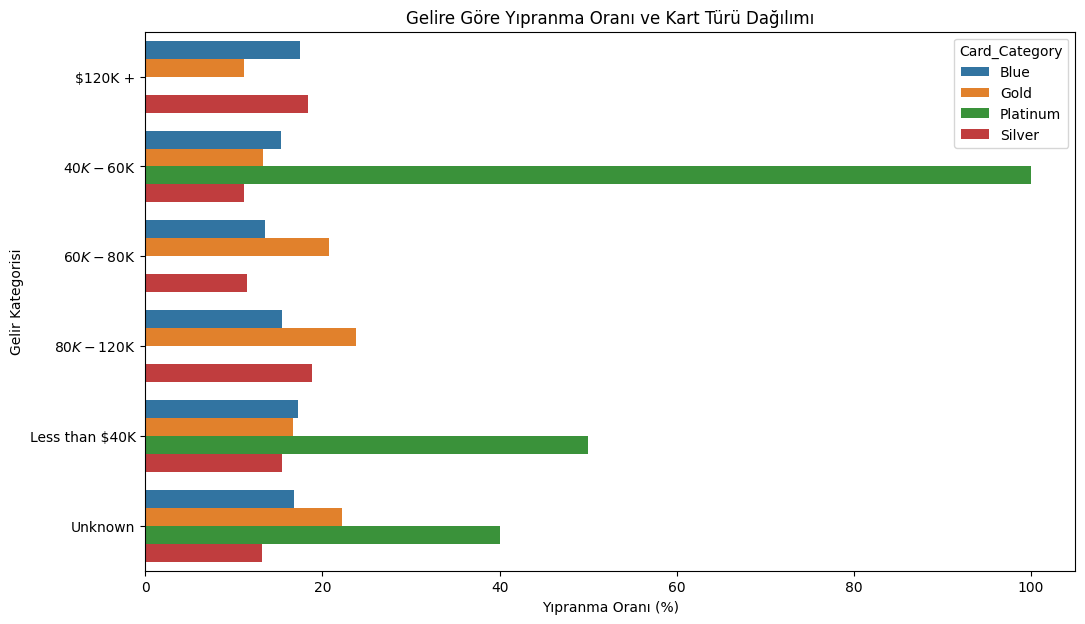

In [92]:


# Yıpranmış müşteri oranını hesaplayalım
# Öncelikle, yıpranmış ve yıpranmamış müşteri oranını hesaplamak için 'Attrition_Flag' sütununu kullanıyoruz

# Gelir ve kart kategorisi sütunlarına göre gruplayalım ve her grubun yıpranma oranını hesaplayalım
attrition_rate = df.groupby(['Card_Category', 'Income_Category', 'Attrition_Flag']).size().unstack(fill_value=0)

# Yıpranma oranını hesaplayalım
attrition_rate['Attrition_Rate'] = (attrition_rate['Attrited Customer'] / (attrition_rate['Attrited Customer'] + attrition_rate['Existing Customer'])) * 100

# Çubuk grafikle görselleştirme
plt.figure(figsize=(12, 7))
sns.barplot(x='Attrition_Rate', y='Income_Category', hue='Card_Category', data=attrition_rate.reset_index())
plt.title('Gelire Göre Yıpranma Oranı ve Kart Türü Dağılımı')
plt.xlabel('Yıpranma Oranı (%)')
plt.ylabel('Gelir Kategorisi')
plt.show()


<Figure size 1200x800 with 0 Axes>

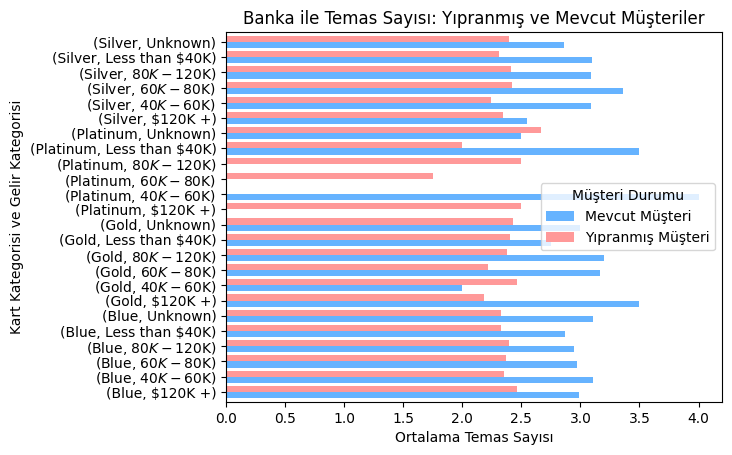

In [93]:


# Yıpranmış ve mevcut müşterilerin banka ile iletişim sayısını gruplandıralım
contact_data = df.groupby(['Card_Category', 'Income_Category', 'Attrition_Flag'])['Contacts_Count_12_mon'].mean().unstack()

# Çubuk grafikle görselleştirme
plt.figure(figsize=(12, 8))
contact_data.plot(kind='barh', stacked=False, color=["#66b3ff", "#ff9999"], width=0.8)
plt.title('Banka ile Temas Sayısı: Yıpranmış ve Mevcut Müşteriler')
plt.xlabel('Ortalama Temas Sayısı')
plt.ylabel('Kart Kategorisi ve Gelir Kategorisi')
plt.legend(title='Müşteri Durumu', labels=['Mevcut Müşteri', 'Yıpranmış Müşteri'])
plt.show()


<Figure size 1200x800 with 0 Axes>

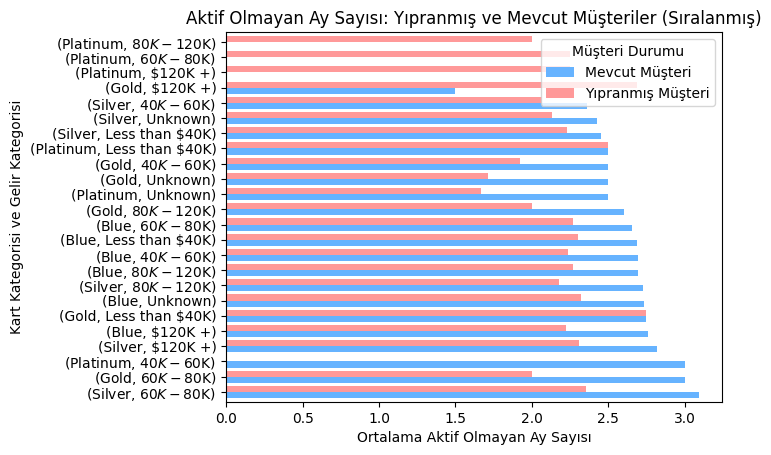

In [94]:
# Yıpranmış ve mevcut müşterilerin ortalama aktif olmayan ay sayısını hesaplayalım
inactive_data = df.groupby(['Card_Category', 'Income_Category', 'Attrition_Flag'])['Months_Inactive_12_mon'].mean().unstack()

# Çubukları sıralama
inactive_data_sorted = inactive_data.sort_values(by='Attrited Customer', axis=0, ascending=False)

# Çubuk grafikle görselleştirme (sıralanmış)
plt.figure(figsize=(12, 8))
inactive_data_sorted.plot(kind='barh', stacked=False, color=["#66b3ff", "#ff9999"], width=0.8)
plt.title('Aktif Olmayan Ay Sayısı: Yıpranmış ve Mevcut Müşteriler (Sıralanmış)')
plt.xlabel('Ortalama Aktif Olmayan Ay Sayısı')
plt.ylabel('Kart Kategorisi ve Gelir Kategorisi')
plt.legend(title='Müşteri Durumu', labels=['Mevcut Müşteri', 'Yıpranmış Müşteri'])
plt.show()


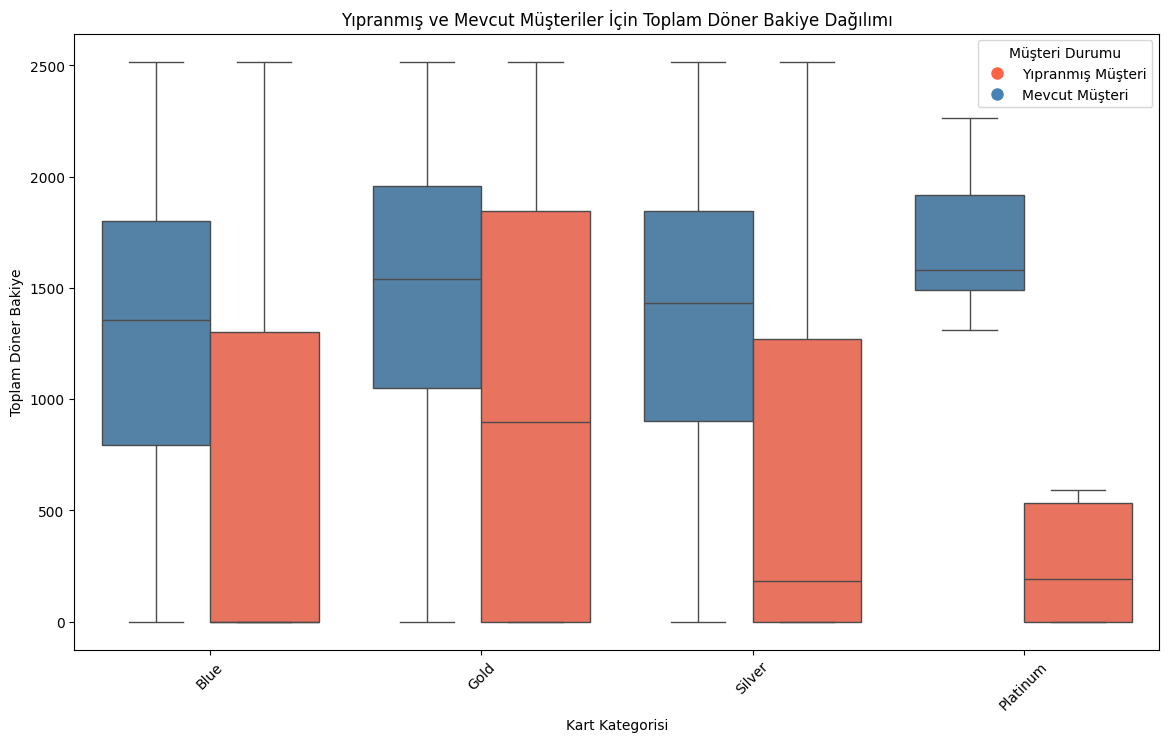

In [95]:

# Kutu grafiği (Boxplot) ile görselleştireceğiz
plt.figure(figsize=(14, 8))

# Toplam döner bakiyeyi ve müşteri durumunu gruplandırıp görselleştirelim
sns.boxplot(x='Card_Category', y='Total_Revolving_Bal', hue='Attrition_Flag', 
            data=df, palette={"Attrited Customer": "#FF6347", "Existing Customer": "#4682B4"}, showfliers=False)

# Grafik başlığı ve etiketler
plt.title('Yıpranmış ve Mevcut Müşteriler İçin Toplam Döner Bakiye Dağılımı')
plt.xlabel('Kart Kategorisi')
plt.ylabel('Toplam Döner Bakiye')

# Özel Legend renkleri
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor='#FF6347', markersize=10, label='Yıpranmış Müşteri'),
           Line2D([0], [0], marker='o', color='w', markerfacecolor='#4682B4', markersize=10, label='Mevcut Müşteri')]

plt.legend(handles=handles, title='Müşteri Durumu')

# X eksenindeki etiketlerin açılarını ayarlayalım
plt.xticks(rotation=45)
plt.show()


/tmp/ipykernel_1814/1476481806.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Card_Category', y='Total_Trans_Amt', hue='Attrition_Flag', data=df, ci=None, palette="coolwarm")


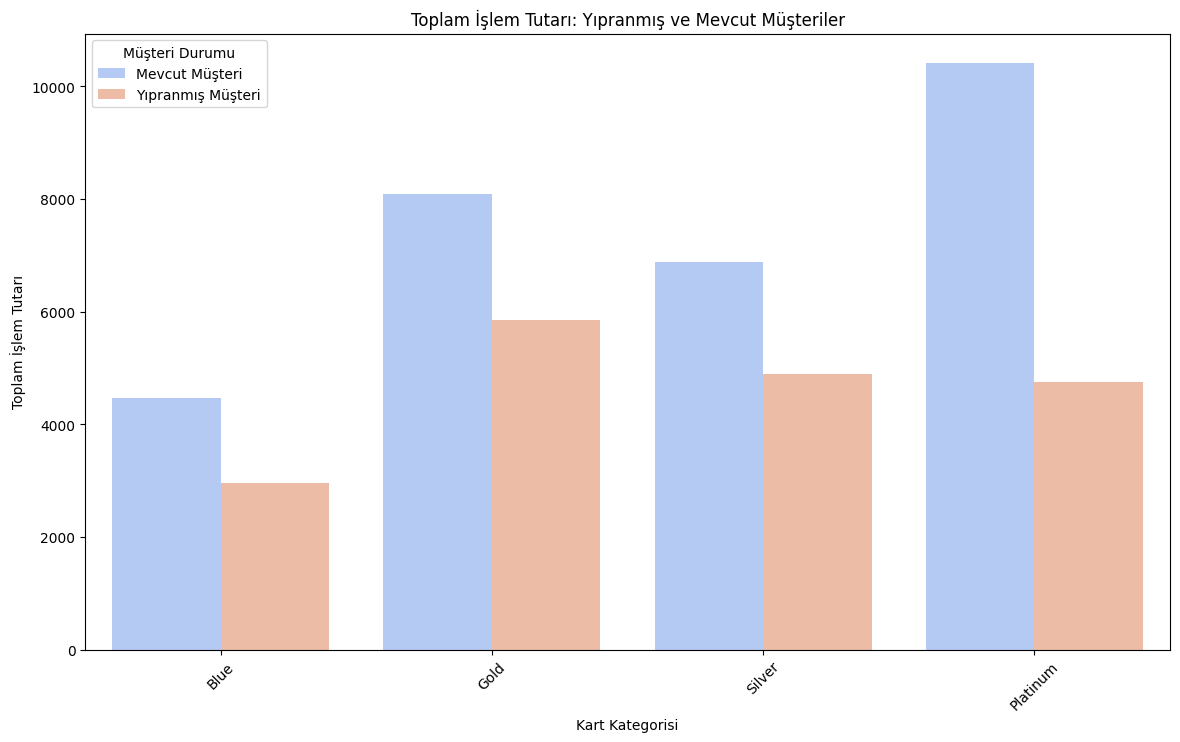

In [96]:


# Veri gruplandırmasını ve toplam işlem tutarını hesaplayalım
plt.figure(figsize=(14, 8))

# Çubuk grafikle görselleştirme
sns.barplot(x='Card_Category', y='Total_Trans_Amt', hue='Attrition_Flag', data=df, ci=None, palette="coolwarm")

plt.title('Toplam İşlem Tutarı: Yıpranmış ve Mevcut Müşteriler')
plt.xlabel('Kart Kategorisi')
plt.ylabel('Toplam İşlem Tutarı')
plt.legend(title='Müşteri Durumu', labels=['Mevcut Müşteri', 'Yıpranmış Müşteri'])
plt.xticks(rotation=45)
plt.show()


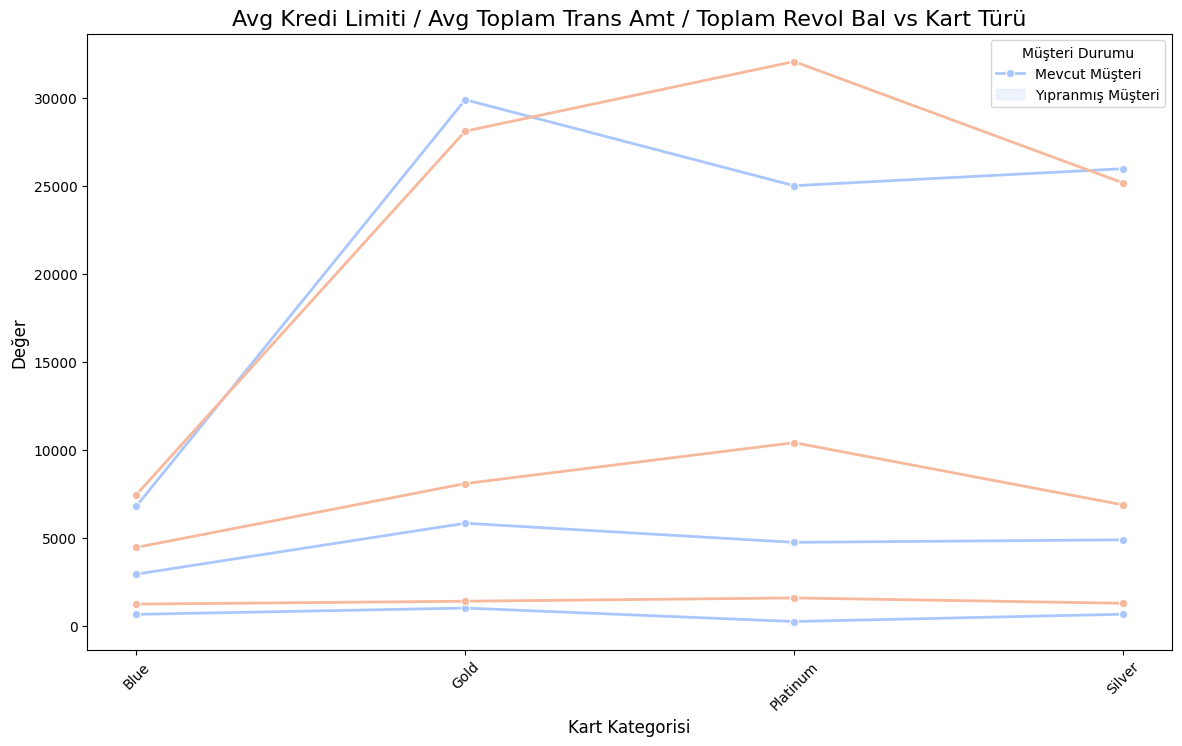

In [97]:


# Kredi limiti, toplam işlem tutarı ve döner bakiyeyi içeren veri oluşturuyoruz
df_avg = df.groupby(['Card_Category', 'Attrition_Flag']).agg({
    'Credit_Limit': 'mean',
    'Total_Trans_Amt': 'mean',
    'Total_Revolving_Bal': 'mean'
}).reset_index()

# Çizgi grafik ile görselleştirme
plt.figure(figsize=(14, 8))

# Çizgi grafik: Kredi Limiti, Toplam İşlem Tutarı ve Toplam Döner Bakiye
sns.lineplot(x='Card_Category', y='Credit_Limit', hue='Attrition_Flag', data=df_avg, marker='o', lw=2, palette="coolwarm")
sns.lineplot(x='Card_Category', y='Total_Trans_Amt', hue='Attrition_Flag', data=df_avg, marker='o', lw=2, palette="coolwarm")
sns.lineplot(x='Card_Category', y='Total_Revolving_Bal', hue='Attrition_Flag', data=df_avg, marker='o', lw=2, palette="coolwarm")

# Başlık ve etiketler
plt.title('Avg Kredi Limiti / Avg Toplam Trans Amt / Toplam Revol Bal vs Kart Türü', fontsize=16)
plt.xlabel('Kart Kategorisi', fontsize=12)
plt.ylabel('Değer', fontsize=12)

# Grafik etiketleri ve çizgi renkleri
plt.legend(title='Müşteri Durumu', labels=['Mevcut Müşteri', 'Yıpranmış Müşteri'])

# X eksenindeki etiketlerin açılarını ayarlayalım
plt.xticks(rotation=45)
plt.show()



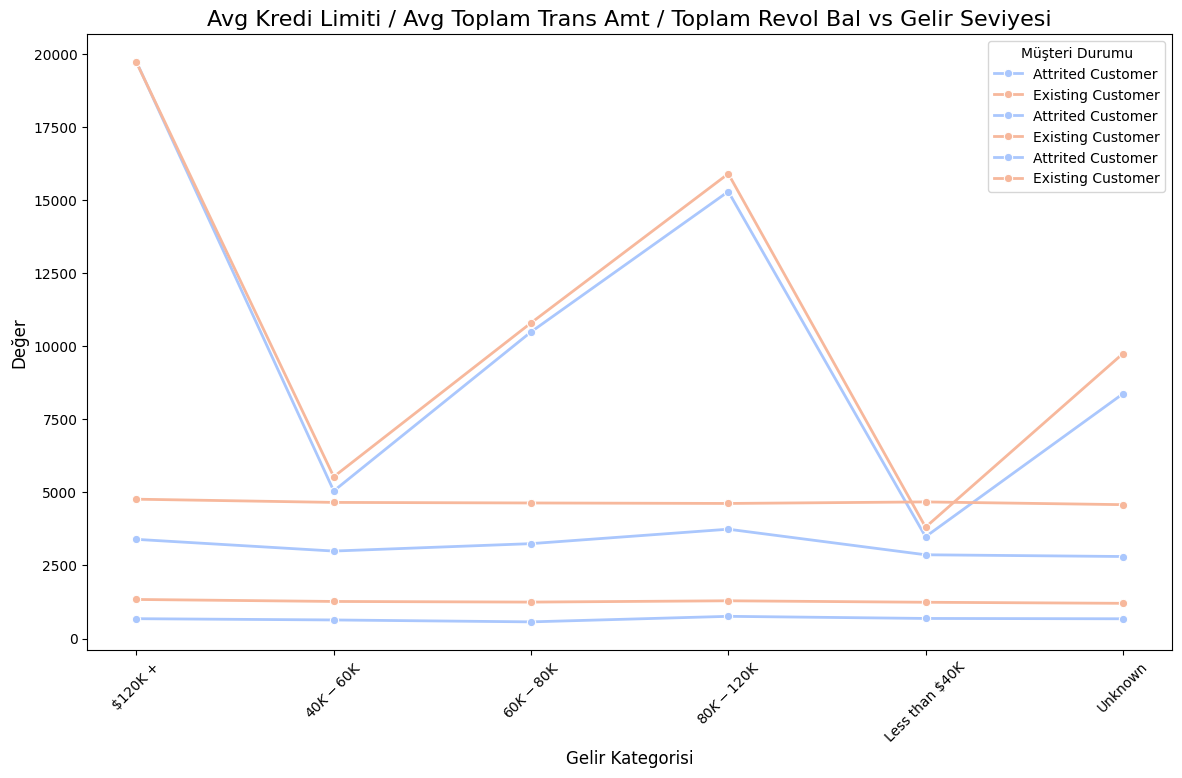

In [98]:


# Gelir kategorisi ve müşteri durumu ile gruplandırarak ortalama değerleri hesaplıyoruz
df_avg = df.groupby(['Income_Category', 'Attrition_Flag']).agg({
    'Credit_Limit': 'mean',
    'Total_Trans_Amt': 'mean',
    'Total_Revolving_Bal': 'mean'
}).reset_index()

# Çizgi grafik ile görselleştirme
plt.figure(figsize=(14, 8))

# Çizgi grafik: Kredi Limiti, Toplam İşlem Tutarı ve Toplam Döner Bakiye
sns.lineplot(x='Income_Category', y='Credit_Limit', hue='Attrition_Flag', data=df_avg, marker='o', lw=2, palette="coolwarm")
sns.lineplot(x='Income_Category', y='Total_Trans_Amt', hue='Attrition_Flag', data=df_avg, marker='o', lw=2, palette="coolwarm")
sns.lineplot(x='Income_Category', y='Total_Revolving_Bal', hue='Attrition_Flag', data=df_avg, marker='o', lw=2, palette="coolwarm")

# Başlık ve etiketler
plt.title('Avg Kredi Limiti / Avg Toplam Trans Amt / Toplam Revol Bal vs Gelir Seviyesi', fontsize=16)
plt.xlabel('Gelir Kategorisi', fontsize=12)
plt.ylabel('Değer', fontsize=12)

# Grafik etiketleri ve çizgi renkleri
plt.legend(title='Müşteri Durumu')

# X eksenindeki etiketlerin açılarını ayarlayalım
plt.xticks(rotation=45)
plt.show()
